In [2]:
#!pip install spotipy --upgrade
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
running = pd.read_csv("../data/running_playlist_tracks.csv")
running.drop(columns="Unnamed: 0", inplace=True)
running.head()

,id,artist,title,album,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,00GOPLxW4PGQuUYdPJh8K1,Childish Gambino,IV. Sweatpants,Because the Internet,71,0.710,0.470,1,-9.330,0,0.1420,0.15400,0.00000,0.6430,0.581,80.027,180675,4
1,00QyLmjxaSEE8qIZQjBXBj,2 Chainz,We Own It (Fast & Furious),Fast & Furious 6,62,0.554,0.899,8,-4.573,1,0.4080,0.05210,0.00000,0.0568,0.552,171.966,227893,4
2,00V7a8gzdZQgvulLe3MDe3,Elliphant,To The End,To The End,0,0.650,0.893,11,-3.340,0,0.0426,0.01300,0.00384,0.0898,0.246,115.005,259773,4
3,00ko9WaS4jOX1kEk3gvHjf,Chance the Rapper,Hot Shower,The Big Day,74,0.899,0.509,9,-8.040,1,0.3870,0.00157,0.00000,0.0573,0.599,150.001,225924,4
4,00qOE7OjRl0BpYiCiweZB2,Foreigner,Juke Box Hero,4 (Expanded),68,0.357,0.653,9,-5.554,1,0.0654,0.08280,0.00000,0.0844,0.522,176.647,259800,4


<IPython.core.display.Javascript object>

Take a sample from the larger dataset
``` python
large = pd.read_csv("../data/spotify_dataset.csv")
large.head()

gen = large.sample(n=5000)

gen.to_csv("../data/sampled_set.csv")
```

In [14]:
gen = pd.read_csv("../data/sampled_set.csv")
gen.drop(columns="Unnamed: 0", inplace=True)
gen.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.992,['Ignacio Corsini'],0.601,111333,0.1980,0,4rTjeJa5upBPcTPWtXYcJz,0.000082,6,0.3850,-19.337,0,Cuando Llora el Corazón - Remasterizado,0,1929-06-20,0.0777,122.350,0.842,1929
1,0.805,['Carole King'],0.650,186200,0.3420,0,7oEIm5uvKfOeMwilOAYb32,0.000006,4,0.0913,-11.345,1,Beautifull,41,1968,0.0289,77.093,0.558,1968
2,0.973,"['Arthur Sullivan', 'Muriel Harding', 'Neville...",0.353,242307,0.0836,0,0cc1sgKtjZtMEzH1qE9tS0,0.000001,6,0.3130,-19.784,1,The Sorcerer / Act 1: 15. Sprites of earth and...,0,1953-01-01,0.0499,89.151,0.149,1953
3,0.322,['Bill LaBounty'],0.648,265640,0.4020,0,3KH39R9cO3ZWN6hqRbTKM3,0.000001,3,0.0886,-14.972,1,This Night Won't Last Forever,30,1978-07-21,0.0241,102.682,0.607,1978
4,0.309,['The Allman Brothers Band'],0.488,259444,0.7210,0,7K4jh3V3fP00WKg7c6lwqA,0.048200,2,0.4370,-9.141,1,"Statesboro Blues - Live At Fillmore East, Marc...",23,1971-07-01,0.0617,125.940,0.786,1971


<IPython.core.display.Javascript object>

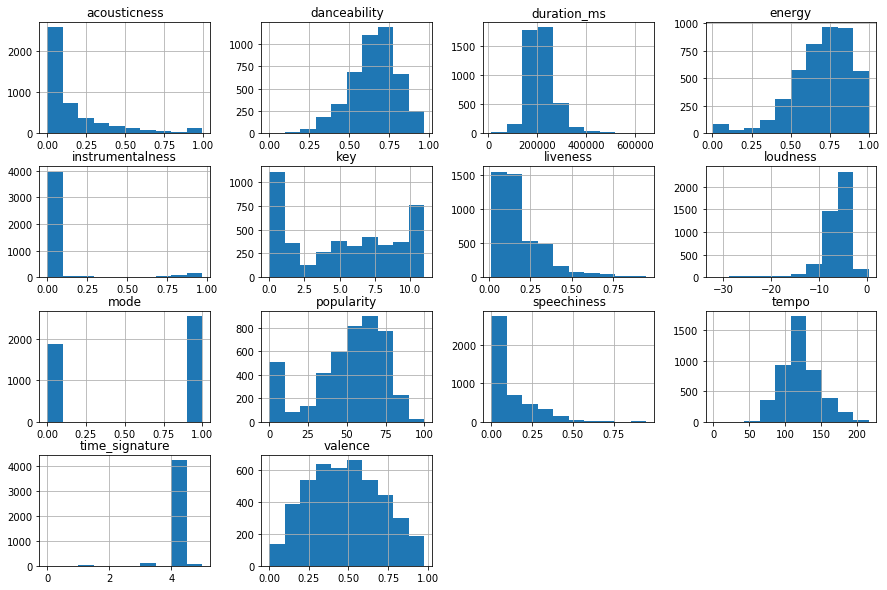

<IPython.core.display.Javascript object>

In [15]:
running.hist(figsize=(15, 10))
plt.show()

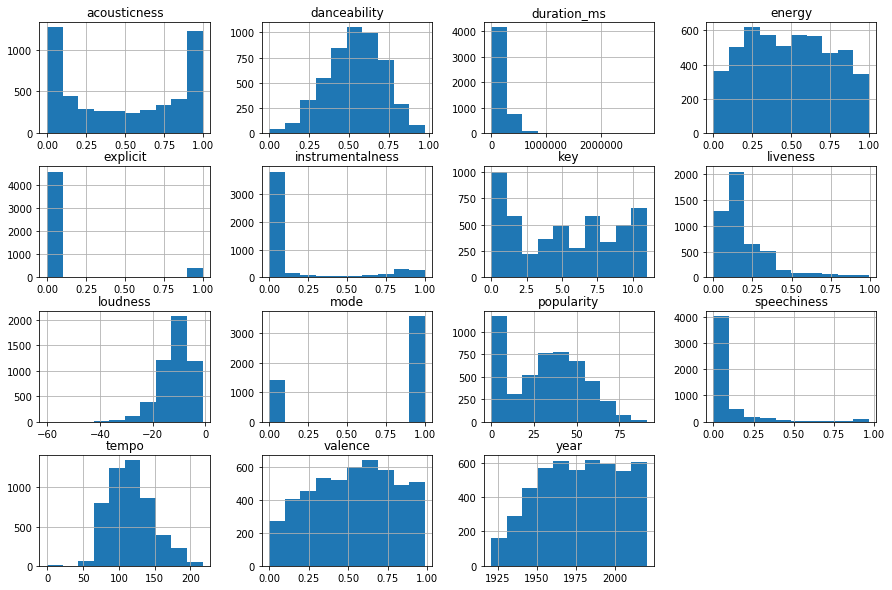

<IPython.core.display.Javascript object>

In [16]:
gen.hist(figsize=(15, 10))
plt.show()

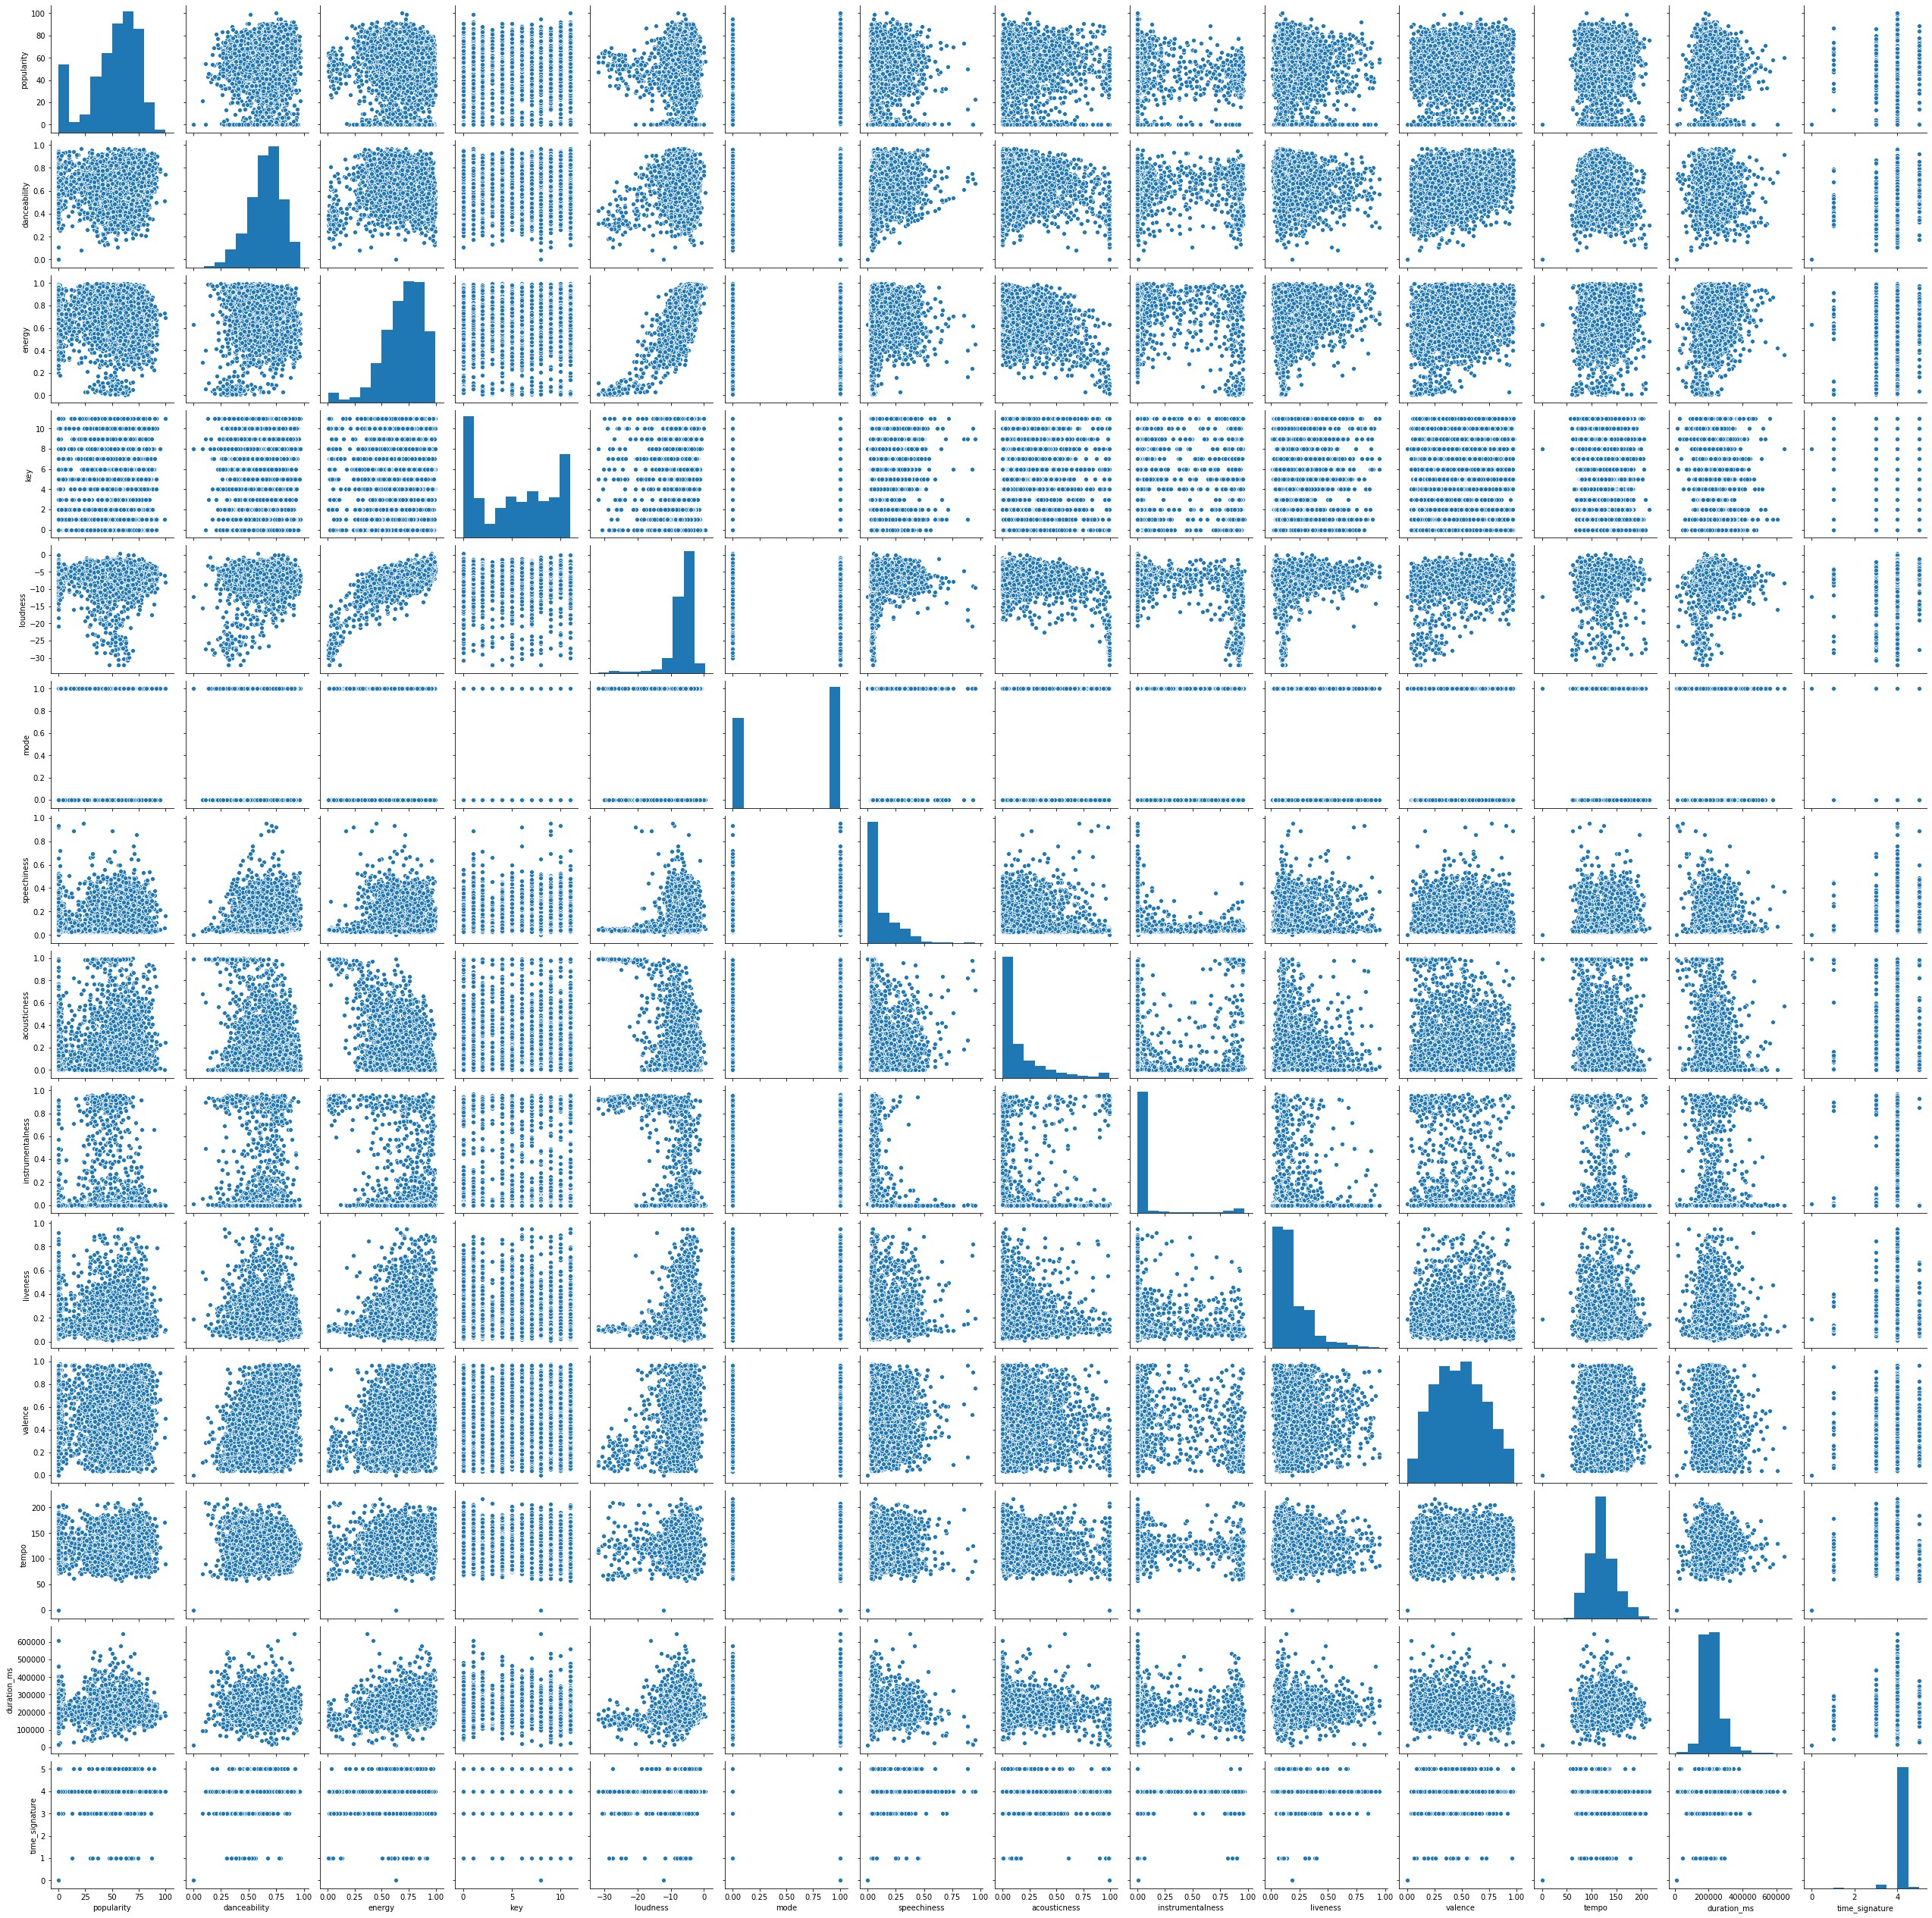

<IPython.core.display.Javascript object>

In [19]:
#sns.pairplot(running)

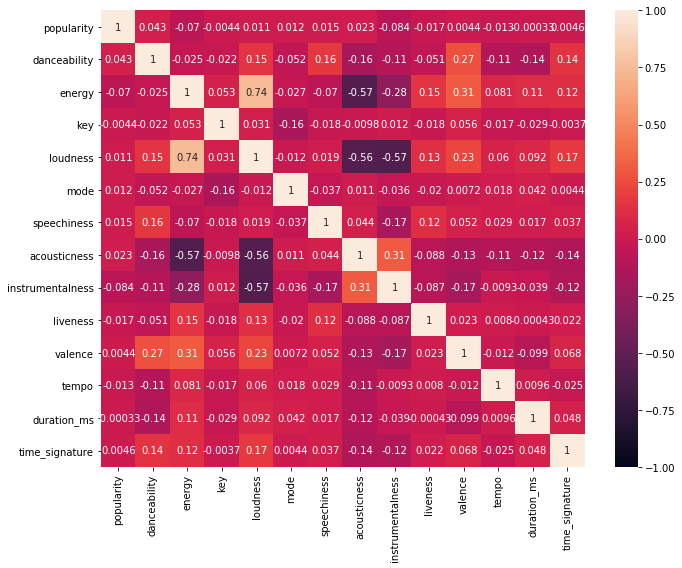

<IPython.core.display.Javascript object>

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(running.corr(), vmin=-1.0, vmax=1.0, annot=True)
plt.tight_layout()
plt.show()

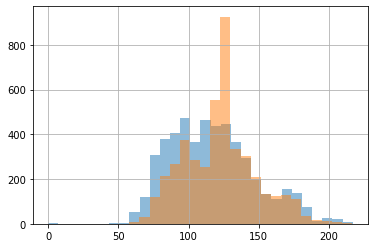

<IPython.core.display.Javascript object>

In [23]:
gen["tempo"].hist(bins=30, alpha=0.5)
running["tempo"].hist(bins=30, alpha=0.5)
plt.show()

In [9]:
stats.ttest_ind(gen["tempo"], running["tempo"])

Ttest_indResult(statistic=-9.484947624483937, pvalue=3.013982187625835e-21)

<IPython.core.display.Javascript object>

In [16]:
stats.describe(running["speechiness"])

DescribeResult(nobs=4455, minmax=(0.0, 0.951), mean=0.1244398204264871, variance=0.014372447825742332, skewness=1.844345362714322, kurtosis=4.105342790405861)

<IPython.core.display.Javascript object>

In [18]:
stats.mannwhitneyu(running["speechiness"], gen["speechiness"])

MannwhitneyuResult(statistic=7718581.5, pvalue=3.816376909633388e-147)

<IPython.core.display.Javascript object>

In [19]:
r_speech_mean = running["speechiness"].mean()
g_speech_mean = gen['speechiness'].mean()

r_speech_mean, g_speech_mean

(0.12443982042648695, 0.09362646000000013)

<IPython.core.display.Javascript object>

In [21]:
stats.describe(running["danceability"])

DescribeResult(nobs=4455, minmax=(0.0, 0.971), mean=0.6555391919191919, variance=0.021799748275054088, skewness=-0.5295621160995195, kurtosis=0.16814882433718692)

<IPython.core.display.Javascript object>

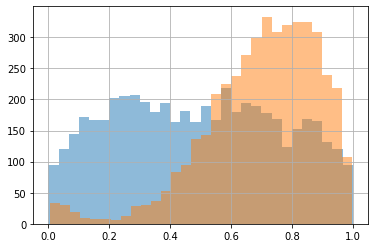

<IPython.core.display.Javascript object>

In [24]:
gen["energy"].hist(bins=30, alpha=0.5)
running["energy"].hist(bins=30, alpha=0.5)
plt.show()

In [20]:
gen.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.992,['Ignacio Corsini'],0.601,111333,0.1980,0,4rTjeJa5upBPcTPWtXYcJz,0.000082,6,0.3850,-19.337,0,Cuando Llora el Corazón - Remasterizado,0,1929-06-20,0.0777,122.350,0.842,1929
1,0.805,['Carole King'],0.650,186200,0.3420,0,7oEIm5uvKfOeMwilOAYb32,0.000006,4,0.0913,-11.345,1,Beautifull,41,1968,0.0289,77.093,0.558,1968
2,0.973,"['Arthur Sullivan', 'Muriel Harding', 'Neville...",0.353,242307,0.0836,0,0cc1sgKtjZtMEzH1qE9tS0,0.000001,6,0.3130,-19.784,1,The Sorcerer / Act 1: 15. Sprites of earth and...,0,1953-01-01,0.0499,89.151,0.149,1953
3,0.322,['Bill LaBounty'],0.648,265640,0.4020,0,3KH39R9cO3ZWN6hqRbTKM3,0.000001,3,0.0886,-14.972,1,This Night Won't Last Forever,30,1978-07-21,0.0241,102.682,0.607,1978
4,0.309,['The Allman Brothers Band'],0.488,259444,0.7210,0,7K4jh3V3fP00WKg7c6lwqA,0.048200,2,0.4370,-9.141,1,"Statesboro Blues - Live At Fillmore East, Marc...",23,1971-07-01,0.0617,125.940,0.786,1971


<IPython.core.display.Javascript object>